# Data Preparation

### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Data Loading

In [3]:
# Memuat data dari file CSV 'BBCA.JK.csv' ke dalam DataFrame
df = pd.read_csv('/content/drive/MyDrive/assets/BBCA.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-08,175.0,180.0,175.0,177.5,105.656075,499150000
1,2004-06-09,177.5,182.5,175.0,180.0,107.144180,294290000
2,2004-06-10,180.0,180.0,177.5,180.0,107.144180,165590000
3,2004-06-11,177.5,180.0,177.5,180.0,107.144180,135830000
4,2004-06-14,180.0,180.0,175.0,177.5,105.656075,158540000
...,...,...,...,...,...,...,...
4876,2024-02-12,9750.0,9800.0,9700.0,9800.0,9800.000000,87949400
4877,2024-02-13,9750.0,9800.0,9700.0,9725.0,9725.000000,66072400
4878,2024-02-15,9950.0,9975.0,9850.0,9850.0,9850.000000,164748900
4879,2024-02-16,9975.0,10000.0,9875.0,9950.0,9950.000000,142277200


# Exploratory Data Analysis (EDA)

### Menyiapkan DataFrame untuk analisis

In [4]:
# Menyiapkan DataFrame untuk analisis
df_analysis=df.copy()

### Menampilkan informasi umum tentang DataFrame

In [5]:
# Menampilkan informasi umum tentang DataFrame
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   Open       4881 non-null   float64
 2   High       4881 non-null   float64
 3   Low        4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Adj Close  4881 non-null   float64
 6   Volume     4881 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 267.1+ KB


### Mengubah date kedalam format datetime

In [6]:
# ubah date menjadi datetime
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])

### Menampilkan ringkasan statistik

In [7]:
# Menampilkan ringkasan statistik deskriptif dari DataFrame
df_analysis.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03
mean,3143.235505,3172.630608,3112.729973,3143.271871,2886.695823,1.078381e+08
std,2706.217590,2727.272606,2685.272032,2706.073835,2662.345316,1.302515e+08
min,175.000000,177.500000,175.000000,177.500000,105.656075,0.000000e+00
25%,720.000000,725.000000,705.000000,720.000000,553.555847,4.898400e+07
50%,2200.000000,2220.000000,2180.000000,2200.000000,1902.267700,7.295500e+07
75%,5315.000000,5395.000000,5240.000000,5295.000000,4900.501465,1.170345e+08
max,9975.000000,10000.000000,9875.000000,9950.000000,9950.000000,1.949960e+09


### Cek missing values

In [8]:
# check missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Visualisasi pairplot korelasi antar fitur

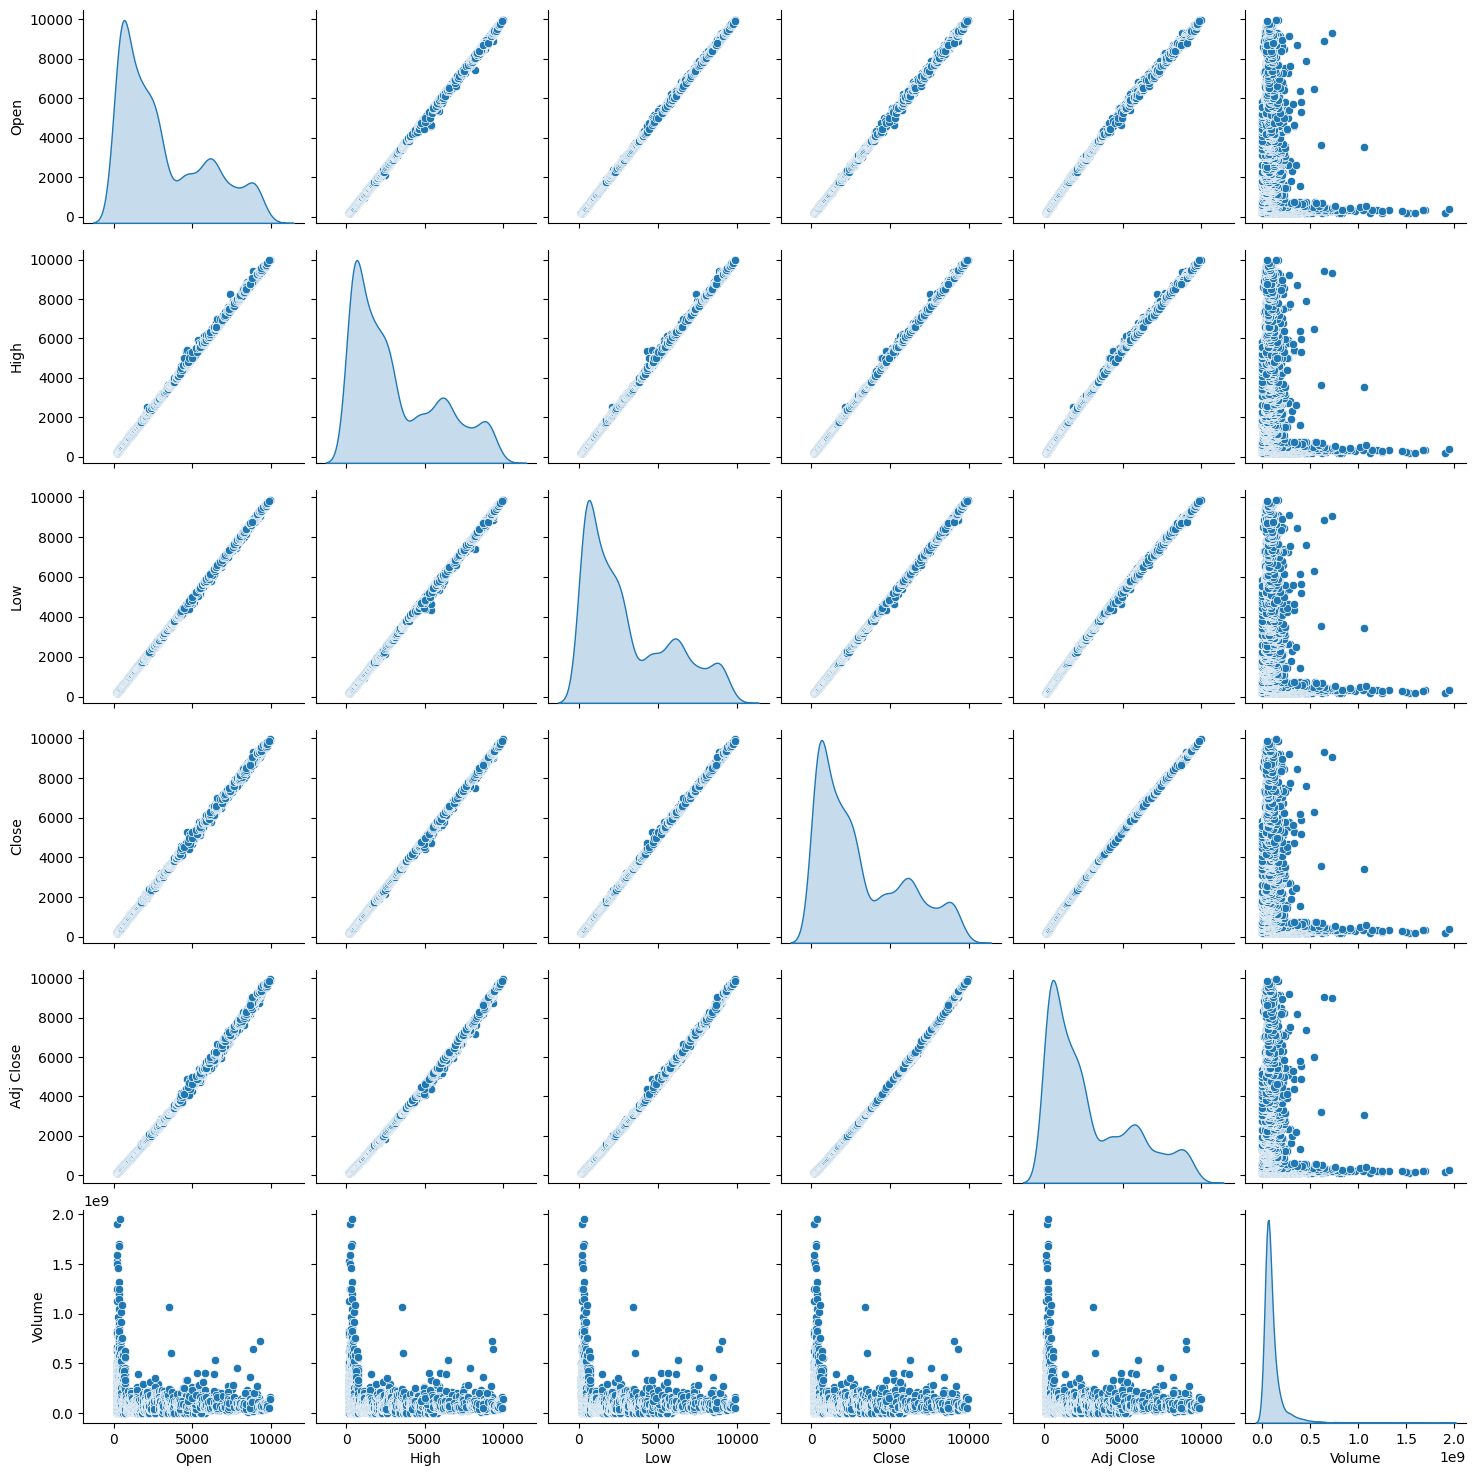

In [9]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_analysis, diag_kind = 'kde')

### Heatmap korelasi antar fitur

<ipython-input-10-35b866a7d8f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_analysis.corr()


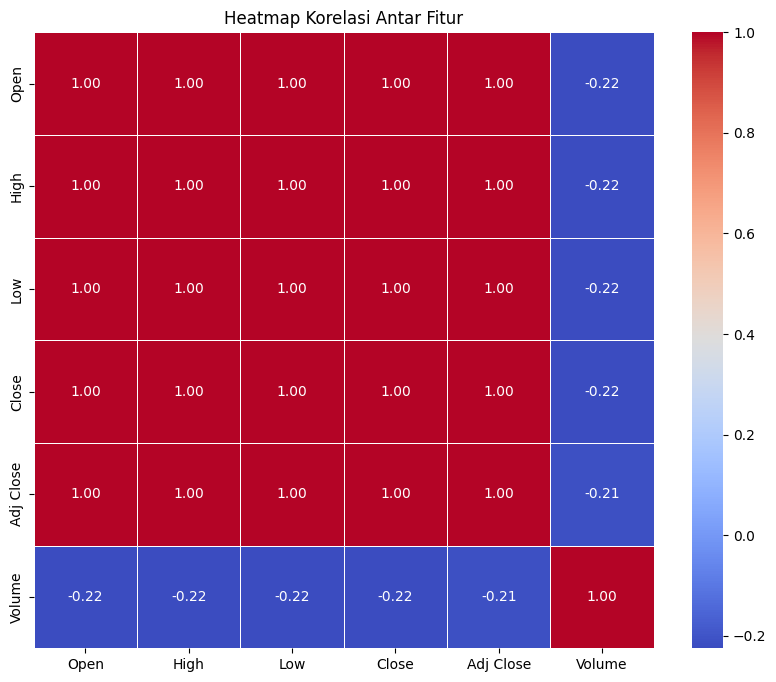

In [10]:
# Menghitung matriks korelasi antar fitur
correlation_matrix = df_analysis.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

### Visualisasi volume perdagangan dan moving average

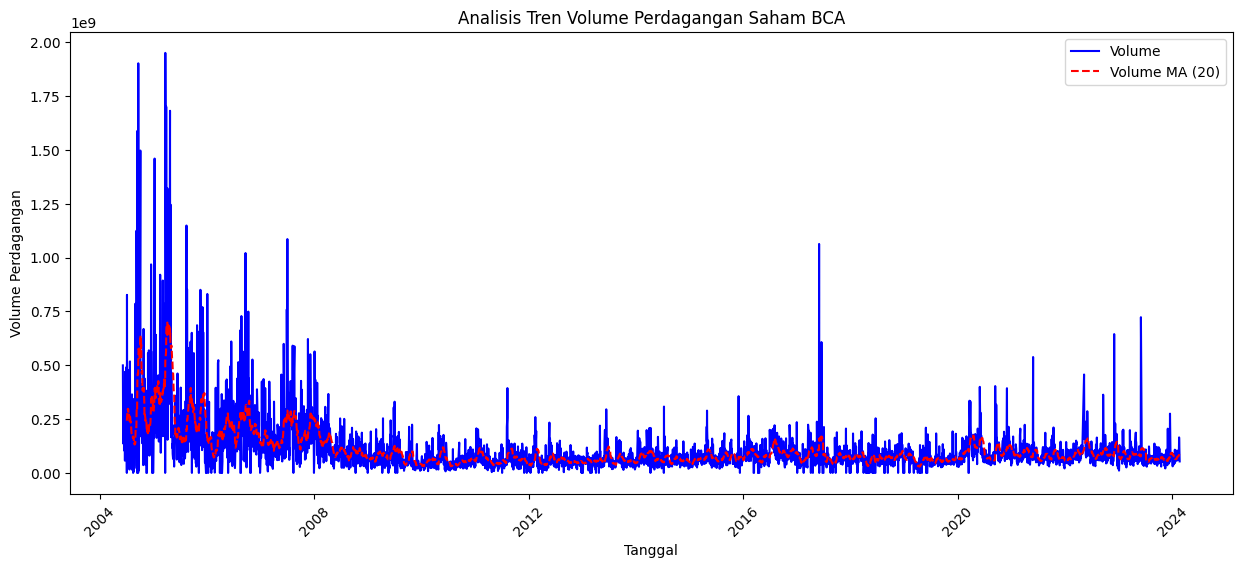

In [11]:
# Menghitung moving average volume perdagangan
df_analysis['Volume_MA'] = df_analysis['Volume'].rolling(window=20).mean()

# Visualisasi volume perdagangan dan moving average
plt.figure(figsize=(15, 6))
plt.plot(df_analysis['Date'], df_analysis['Volume'], label='Volume', color='blue')
plt.plot(df_analysis['Date'], df_analysis['Volume_MA'], label='Volume MA (20)', color='red', linestyle='--')
plt.title('Analisis Tren Volume Perdagangan Saham BCA')
plt.xlabel('Tanggal')
plt.ylabel('Volume Perdagangan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Visualisasi tren harga saham BCA

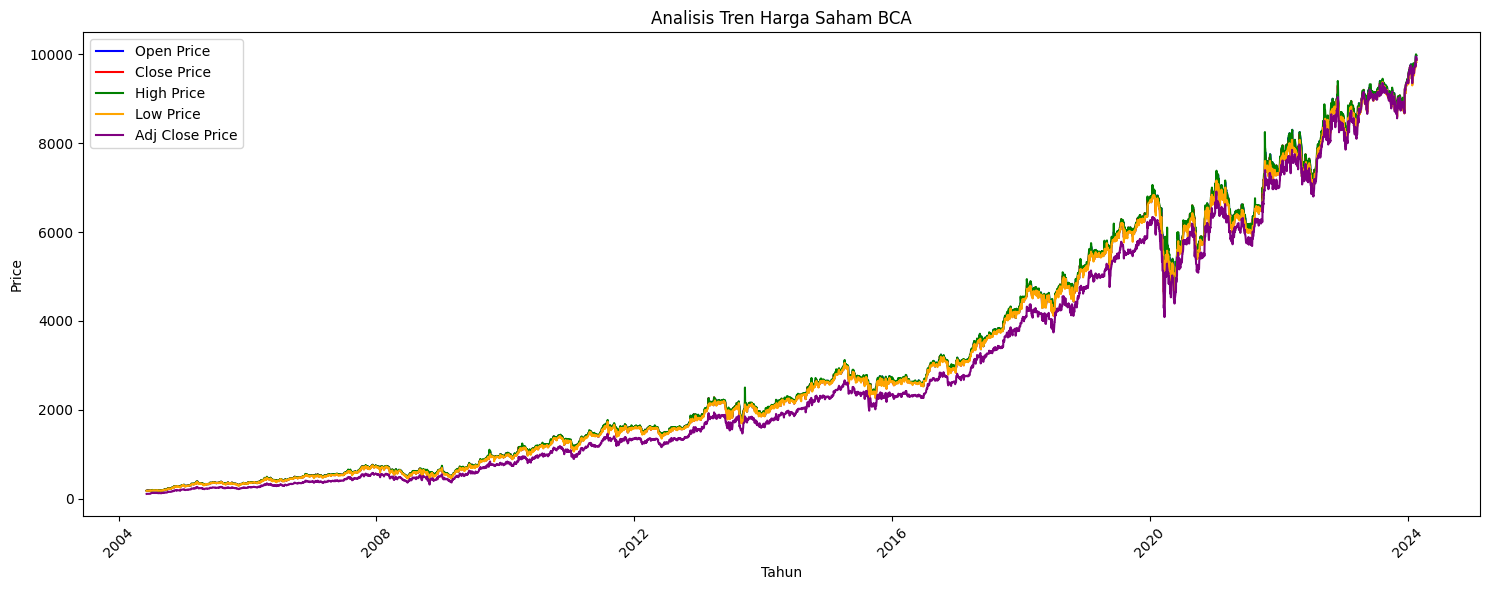

In [12]:
# Visualisasi tren harga saham BCA
plt.figure(figsize=(15, 6))
prices = ['Open', 'Close', 'High', 'Low', 'Adj Close']
colors = ['blue', 'red', 'green', 'orange', 'purple']

for price, color in zip(prices, colors):
    plt.plot(df_analysis['Date'], df_analysis[price], label=f'{price} Price', color=color)

plt.xticks(rotation=45)
plt.ylabel('Price')
plt.xlabel('Tahun')
plt.title("Analisis Tren Harga Saham BCA")
plt.legend()
plt.tight_layout()
plt.show()


### Visualisasi Close Price dan Moving Average 

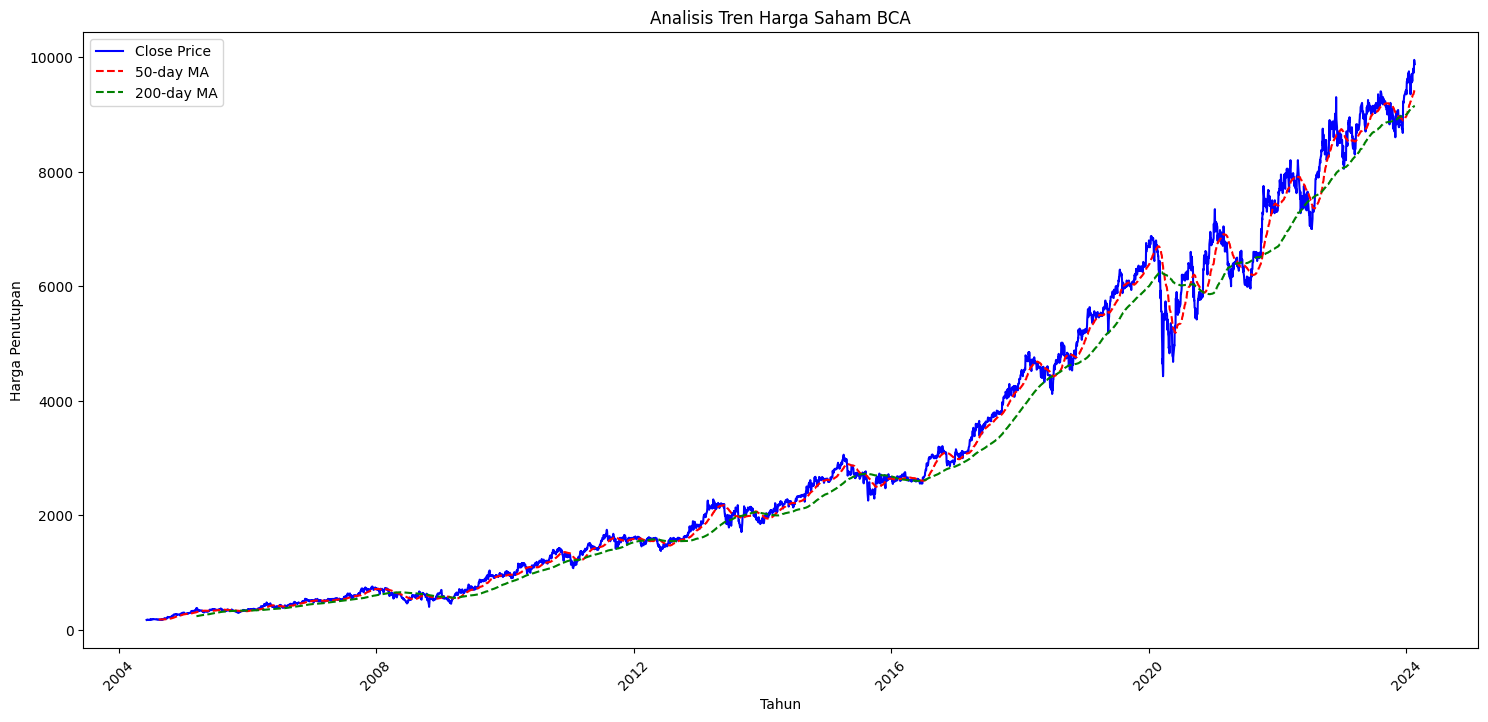

In [13]:
# Menghitung moving average
df_analysis['MA_50'] = df_analysis['Close'].rolling(window=50).mean()
df_analysis['MA_200'] = df_analysis['Close'].rolling(window=200).mean()

# Visualisasi harga penutupan dan moving average
plt.figure(figsize=(18, 8))
plt.plot(df_analysis['Date'], df_analysis['Close'], label='Close Price', color='blue')
plt.plot(df_analysis['Date'], df_analysis['MA_50'], label='50-day MA', color='red', linestyle='--')
plt.plot(df_analysis['Date'], df_analysis['MA_200'], label='200-day MA', color='green', linestyle='--')
plt.title('Analisis Tren Harga Saham BCA')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Data Preprocessing

### Fitur Seleksi

In [14]:
# Mengambil kolom Date dan Close dari DataFrame df_analysis
final_df=df_analysis[['Date','Close']]

# Mengambil kolom 'Close' sebagai kolom target
X = final_df['Close'].values.reshape(-1, 1)

###  Pembagian dataset

In [15]:
# Memisahkan data training dan data testing
data_train, data_test = train_test_split(X,test_size=0.2,shuffle=False)

In [16]:
print(f"Jumlah data training : {data_train.shape}")
print(f"Jumlah data testing : {data_test.shape}")

Jumlah data training : (3904, 1)
Jumlah data testing : (977, 1)


### Normalisasi

In [17]:
# Melakukan normalisasi
sc = MinMaxScaler()
train_scaled = sc.fit_transform(data_train)
test_scaled = sc.fit_transform(data_test)

### Mengubah dimensi dan menentukan variabel x dan y

In [18]:
# Mempersiapkan data untuk pelatihan model
input_size = 100
def prepare_data(data, input_size):
    X, y = [], []
    for i in range(input_size, len(data)):
        X.append(data[i - input_size:i, 0])
        y.append(data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = prepare_data(train_scaled, input_size)
X_test, y_test = prepare_data(test_scaled, input_size)

# Modeling

## LSTM Tensorflow

### Menginstall library KerasTuner

In [19]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.2 MB/s eta 0:00:00


### Import library Tensorflow dan kerastuner

In [20]:
# Import library Tensorflow dan kerastuner
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from kerastuner.tuners import RandomSearch

<ipython-input-20-cf58131ad84a>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Membuat Callback

In [21]:
# Callback untuk membatasi proses pelatihan
class RMSEThresholdCallback(Callback):
    def __init__(self, threshold):
        super(RMSEThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs={}):
        current_rmse = logs.get('root_mean_squared_error')
        current_val_rmse = logs.get('val_root_mean_squared_error')
        if (current_rmse <= self.threshold) and (current_val_rmse <= self.threshold) :
            print(f"\nEpoch {epoch + 1}: Training RMSE ({current_rmse:.4f}), Validation RMSE ({current_val_rmse:.4f}), does not exceed threshold ({self.threshold:.4f}). Stopping training.")
            self.model.stop_training = True

X_scaled = sc.fit_transform(X)
threshold_scaled_rmse = (X_scaled.max() - X_scaled.min()) * 1 / 100
rmse_threshold_callback = RMSEThresholdCallback(threshold_scaled_rmse)
print(f"Threshold scaled RMSE: {threshold_scaled_rmse:.4f}")

Threshold scaled RMSE: 0.0100


In [22]:
# Fungsi callback yang digunakan
callbacks = [
    EarlyStopping(monitor='root_mean_squared_error', patience=15, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.h5', monitor='root_mean_squared_error', save_best_only=True, verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001, verbose=1), #
    rmse_threshold_callback
]

### Membangun model LSTM

In [23]:
# Membangun model LSTM
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=16, max_value=256, step=16),
                   return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=hp.Int('units', min_value=16, max_value=256, step=16)))
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=8, max_value=64, step=8), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
    return model


### Hyperparameter Tuning

In [24]:
# Menggunakan kerastuner untuk menentukan hyperparameter terbaik
tuner = RandomSearch(
    build_model,
    objective='loss',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='BCA_stock_forecasting')

tuner.search(X_train, y_train,
             epochs=10,
             batch_size=17,
             validation_data=(X_test, y_test))


Trial 46 Complete [00h 00m 46s]
loss: 0.00012378474639263004

Best loss So Far: 8.774059824645519e-05
Total elapsed time: 00h 30m 29s


### Membuat model dari hiperparameter terbaik

In [25]:
# Mengambil model terbaik dari kerastuner
best_model_tf = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters()[0]
best_model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 144)          84096     
                                                                 
 lstm_1 (LSTM)               (None, 144)               166464    
                                                                 
 dense (Dense)               (None, 144)               20880     
                                                                 
 dense_1 (Dense)             (None, 144)               20880     
                                                                 
 dense_2 (Dense)             (None, 1)                 145       
                                                                 
Total params: 292465 (1.12 MB)
Trainable params: 292465 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Mengcompile dan training model

In [26]:
# Compile dan latih model terbaik
best_model_tf.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                   loss=MeanSquaredError(),
                   metrics=[RootMeanSquaredError()])

history_tf = best_model_tf.fit(X_train, y_train,
                         epochs=100,
                         validation_data=(X_test, y_test),
                         callbacks=callbacks,
                         batch_size=17)

Epoch 1/100
224/224 [==============================] - ETA: 0s - loss: 2.5762e-04 - root_mean_squared_error: 0.0161
Epoch 1: root_mean_squared_error improved from inf to 0.01605, saving model to best_model.h5
224/224 [==============================] - 8s 16ms/step - loss: 2.5762e-04 - root_mean_squared_error: 0.0161 - val_loss: 9.9249e-04 - val_root_mean_squared_error: 0.0315 - lr: 0.0010
Epoch 2/100
 13/224 [>.............................] - ETA: 2s - loss: 2.1536e-04 - root_mean_squared_error: 0.0147

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/224 [============================>.] - ETA: 0s - loss: 9.8265e-05 - root_mean_squared_error: 0.0099
Epoch 2: root_mean_squared_error improved from 0.01605 to 0.00992, saving model to best_model.h5
224/224 [==============================] - 3s 12ms/step - loss: 9.8380e-05 - root_mean_squared_error: 0.0099 - val_loss: 5.9455e-04 - val_root_mean_squared_error: 0.0244 - lr: 0.0010
Epoch 3/100
221/224 [============================>.] - ETA: 0s - loss: 1.1362e-04 - root_mean_squared_error: 0.0107
Epoch 3: root_mean_squared_error did not improve from 0.00992
224/224 [==============================] - 2s 11ms/step - loss: 1.1365e-04 - root_mean_squared_error: 0.0107 - val_loss: 8.3513e-04 - val_root_mean_squared_error: 0.0289 - lr: 0.0010
Epoch 4/100
220/224 [============================>.] - ETA: 0s - loss: 8.6091e-05 - root_mean_squared_error: 0.0093
Epoch 4: root_mean_squared_error improved from 0.00992 to 0.00929, saving model to best_model.h5
224/224 [==============================] -

### Visualisasi Root Mean Squared Error (RMSE)

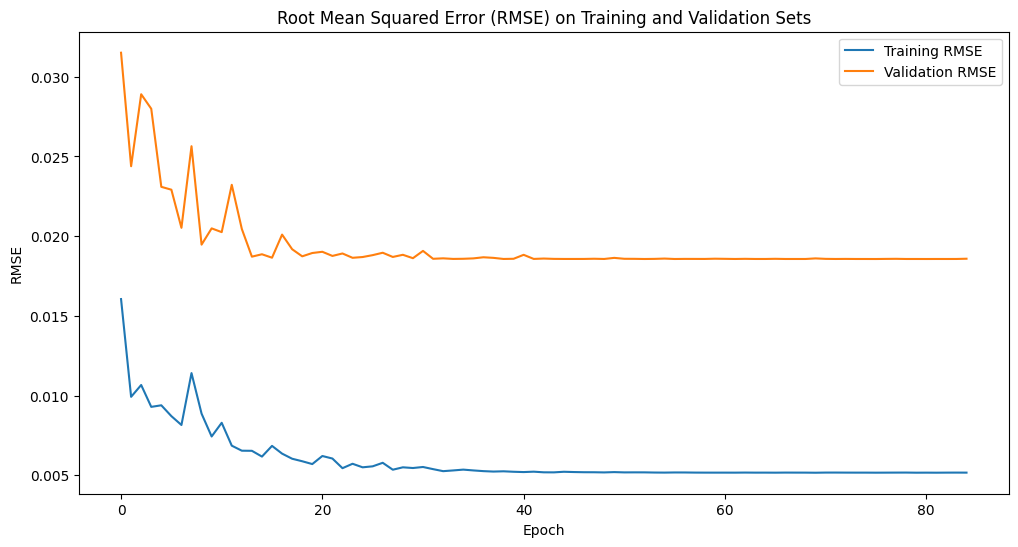

In [27]:
# Plot RMSE
plt.figure(figsize=(12, 6))
plt.plot(history_tf.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history_tf.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Root Mean Squared Error (RMSE) on Training and Validation Sets')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Visualisasi Mean Squared Error (MSE)

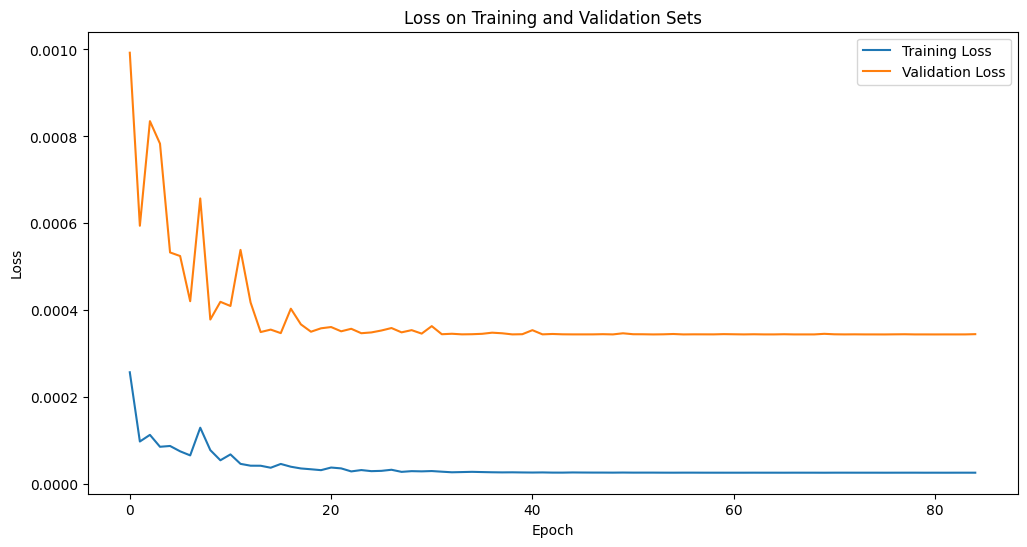

In [28]:
# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history_tf.history['loss'], label='Training Loss')
plt.plot(history_tf.history['val_loss'], label='Validation Loss')
plt.title('Loss on Training and Validation Sets')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## LSTM Pytorch

### Menginstall library optuna

In [29]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.9 MB/s eta 0:00:00


### Import library pytorch dan optuna

In [30]:
# Import library pytorch dan optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import optuna

### Membangun model LSTM

In [31]:
# Membangun model LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        # Membuat parameter LSTM
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Membuat hidden state dan cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


### Membuat fungsi evaluasi model

In [32]:
# Membuat fungsi evaluasi model
def evaluate_model(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * len(inputs)
    return total_loss / len(dataloader.dataset)

### Membuat callback earlystopping

In [33]:
# Membuat callback earlystopping
class EarlyStopping:
    def __init__(self, patience=10, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None: # Simpan model pertama dan skornya
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score:  # Perbarui skor terbaik dan simpan model baru jika lebih baik
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else: # Skor tidak lebih baik, tetapi reset counter
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model): # Checkpoint model
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

### Membuat fungsi train model

In [34]:
# Fungsi train model
def train_model(model, criterion, optimizer, train_loader, valid_loader, num_epochs):
    early_stopping = EarlyStopping(patience=5, verbose=True)
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * len(inputs)
        train_loss /= len(train_loader.dataset)

        valid_loss = evaluate_model(model, criterion, valid_loader)

        print(f'Epoch {epoch+1}/{num_epochs}, mse: {train_loss:.6f}, val_mse: {valid_loss:.6f}')

        if early_stopping.early_stop: # Berhenti jika early stopping aktif
            print("Early stopping")
            break

    print('Training finished')

### Membuat fungsi objektif untuk menentukan parameter yang dituning

In [35]:
def objective(trial):
    # Definisikan hyperparameter yang akan dioptimalkan
    hidden_size = trial.suggest_int('hidden_size', 16, 256, step=16)
    num_layers = trial.suggest_int('num_layers', 1, 4, step=1)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    # Inisialisasi model dengan hyperparameter yang diusulkan
    model = LSTMModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training model
    num_epochs = 5
    batch_size = 42
    train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

     # Evaluasi model dengan data validasi
    valid_dataset = TensorDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

    train_model(model, criterion, optimizer, train_loader, valid_loader, num_epochs)
    valid_loss = evaluate_model(model, criterion, valid_loader)

    return valid_loss

### Hyperparameter Tuning

In [36]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Ambil hasil hyperparameter terbaik
best_params = study.best_params
print("Best Params:", best_params)

[I 2024-02-21 15:19:12,148] A new study created in memory with name: no-name-b1a5e1e3-3f67-4c88-84d1-bd69ae454108
<ipython-input-35-d53dc2815b3a>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([42])) that is different to the input size (torch.Size([42, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([37])) that is different to the input size (torch.Size([37, 1])). This will likely lead to incorrect results due t

Epoch 1/5, mse: 0.002413, val_mse: 0.156749
Epoch 2/5, mse: 0.093008, val_mse: 0.067459
Epoch 3/5, mse: 0.054497, val_mse: 0.026171
Epoch 4/5, mse: 0.045324, val_mse: 0.018629
Epoch 5/5, mse: 0.025777, val_mse: 0.005731
Training finished


[I 2024-02-21 15:22:20,425] Trial 0 finished with value: 0.005731456995752673 and parameters: {'hidden_size': 208, 'num_layers': 2, 'learning_rate': 0.00011598519780070666}. Best is trial 0 with value: 0.005731456995752673.
<ipython-input-35-d53dc2815b3a>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)


Epoch 1/5, mse: 0.002289, val_mse: 0.227112
Epoch 2/5, mse: 0.023492, val_mse: 0.142760
Epoch 3/5, mse: 0.060476, val_mse: 0.126791
Epoch 4/5, mse: 0.095330, val_mse: 0.050593
Epoch 5/5, mse: 0.077872, val_mse: 0.047900
Training finished


[I 2024-02-21 15:23:34,971] Trial 1 finished with value: 0.047899827386593465 and parameters: {'hidden_size': 96, 'num_layers': 2, 'learning_rate': 0.007442272242510845}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.003216, val_mse: 0.195495
Epoch 2/5, mse: 0.096367, val_mse: 0.043060
Epoch 3/5, mse: 0.094971, val_mse: 0.105570
Epoch 4/5, mse: 0.072125, val_mse: 0.100124
Epoch 5/5, mse: 0.052903, val_mse: 0.180352
Training finished


[I 2024-02-21 15:23:55,074] Trial 2 finished with value: 0.1803519436027621 and parameters: {'hidden_size': 32, 'num_layers': 4, 'learning_rate': 0.0011733986967958215}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.003004, val_mse: 0.200005
Epoch 2/5, mse: 0.114568, val_mse: 0.109202
Epoch 3/5, mse: 0.065413, val_mse: 0.066246
Epoch 4/5, mse: 0.067039, val_mse: 0.029567
Epoch 5/5, mse: 0.038378, val_mse: 0.010242
Training finished


[I 2024-02-21 15:26:47,648] Trial 3 finished with value: 0.010242210338853232 and parameters: {'hidden_size': 128, 'num_layers': 4, 'learning_rate': 0.00011736321052091707}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.002381, val_mse: 0.094732
Epoch 2/5, mse: 0.016562, val_mse: 0.167649
Epoch 3/5, mse: 0.029488, val_mse: 0.113320
Epoch 4/5, mse: 0.021834, val_mse: 0.174283
Epoch 5/5, mse: 0.026223, val_mse: 0.157923
Training finished


[I 2024-02-21 15:27:43,424] Trial 4 finished with value: 0.15792280114643453 and parameters: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.0035738653404511263}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.002312, val_mse: 0.275606
Epoch 2/5, mse: 0.030390, val_mse: 0.168864
Epoch 3/5, mse: 0.053918, val_mse: 0.183539
Epoch 4/5, mse: 0.074685, val_mse: 0.052008
Epoch 5/5, mse: 0.086756, val_mse: 0.043786
Training finished


[I 2024-02-21 15:45:42,290] Trial 5 finished with value: 0.043786215787448686 and parameters: {'hidden_size': 256, 'num_layers': 4, 'learning_rate': 0.0028024850868039776}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.002568, val_mse: 0.131139
Epoch 2/5, mse: 0.032825, val_mse: 0.266328
Epoch 3/5, mse: 0.053342, val_mse: 0.112340
Epoch 4/5, mse: 0.095450, val_mse: 0.068779
Epoch 5/5, mse: 0.060552, val_mse: 0.098163
Training finished


[I 2024-02-21 15:49:11,463] Trial 6 finished with value: 0.09816283724661555 and parameters: {'hidden_size': 176, 'num_layers': 3, 'learning_rate': 0.0004436613822327934}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.029608, val_mse: 0.207300
Epoch 2/5, mse: 0.054724, val_mse: 0.142559
Epoch 3/5, mse: 0.045462, val_mse: 0.202118
Epoch 4/5, mse: 0.056603, val_mse: 0.223989
Epoch 5/5, mse: 0.060774, val_mse: 0.241847
Training finished


[I 2024-02-21 16:05:26,578] Trial 7 finished with value: 0.2418465936798581 and parameters: {'hidden_size': 256, 'num_layers': 2, 'learning_rate': 0.009199452690103714}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.002432, val_mse: 0.250429
Epoch 2/5, mse: 0.033029, val_mse: 0.217176
Epoch 3/5, mse: 0.053219, val_mse: 0.281586
Epoch 4/5, mse: 0.047434, val_mse: 0.186885
Epoch 5/5, mse: 0.053477, val_mse: 0.078374
Training finished


[I 2024-02-21 16:07:47,844] Trial 8 finished with value: 0.07837432062443443 and parameters: {'hidden_size': 112, 'num_layers': 4, 'learning_rate': 0.005317354264474832}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.002079, val_mse: 0.126641
Epoch 2/5, mse: 0.013304, val_mse: 0.217759
Epoch 3/5, mse: 0.019009, val_mse: 0.149193
Epoch 4/5, mse: 0.020156, val_mse: 0.086559
Epoch 5/5, mse: 0.012550, val_mse: 0.063796
Training finished


[I 2024-02-21 16:08:49,966] Trial 9 finished with value: 0.06379635816457509 and parameters: {'hidden_size': 192, 'num_layers': 1, 'learning_rate': 0.004731422182812597}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.039280, val_mse: 0.070599
Epoch 2/5, mse: 0.121387, val_mse: 0.096733
Epoch 3/5, mse: 0.065883, val_mse: 0.078217
Epoch 4/5, mse: 0.067431, val_mse: 0.071898
Epoch 5/5, mse: 0.064394, val_mse: 0.062448
Training finished


[I 2024-02-21 16:09:14,733] Trial 10 finished with value: 0.06244767245123993 and parameters: {'hidden_size': 48, 'num_layers': 3, 'learning_rate': 0.0001146463934991702}. Best is trial 0 with value: 0.005731456995752673.


Epoch 1/5, mse: 0.003173, val_mse: 0.192947
Epoch 2/5, mse: 0.086219, val_mse: 0.030933
Epoch 3/5, mse: 0.052546, val_mse: 0.018924
Epoch 4/5, mse: 0.032220, val_mse: 0.005593
Epoch 5/5, mse: 0.012249, val_mse: 0.005464
Training finished


[I 2024-02-21 16:12:02,604] Trial 11 finished with value: 0.005464281869824963 and parameters: {'hidden_size': 208, 'num_layers': 2, 'learning_rate': 0.0001611585588060583}. Best is trial 11 with value: 0.005464281869824963.


Epoch 1/5, mse: 0.001759, val_mse: 0.130470
Epoch 2/5, mse: 0.041894, val_mse: 0.184813
Epoch 3/5, mse: 0.069479, val_mse: 0.048729
Epoch 4/5, mse: 0.034182, val_mse: 0.007147
Epoch 5/5, mse: 0.013237, val_mse: 0.005313
Training finished


[I 2024-02-21 16:14:56,070] Trial 12 finished with value: 0.005312784096123088 and parameters: {'hidden_size': 208, 'num_layers': 2, 'learning_rate': 0.00031016262468654105}. Best is trial 12 with value: 0.005312784096123088.


Epoch 1/5, mse: 0.002416, val_mse: 0.093791
Epoch 2/5, mse: 0.036324, val_mse: 0.146483
Epoch 3/5, mse: 0.060837, val_mse: 0.157313
Epoch 4/5, mse: 0.058887, val_mse: 0.017507
Epoch 5/5, mse: 0.030957, val_mse: 0.010988
Training finished


[I 2024-02-21 16:18:13,153] Trial 13 finished with value: 0.010988068820387253 and parameters: {'hidden_size': 224, 'num_layers': 2, 'learning_rate': 0.0003105541573717578}. Best is trial 12 with value: 0.005312784096123088.


Epoch 1/5, mse: 0.002973, val_mse: 0.068317
Epoch 2/5, mse: 0.058558, val_mse: 0.023260
Epoch 3/5, mse: 0.056713, val_mse: 0.022252
Epoch 4/5, mse: 0.032834, val_mse: 0.018353
Epoch 5/5, mse: 0.019231, val_mse: 0.003836
Training finished


[I 2024-02-21 16:19:02,506] Trial 14 finished with value: 0.0038359786817610706 and parameters: {'hidden_size': 160, 'num_layers': 1, 'learning_rate': 0.0002774990719818654}. Best is trial 14 with value: 0.0038359786817610706.


Epoch 1/5, mse: 0.001476, val_mse: 0.154148
Epoch 2/5, mse: 0.041676, val_mse: 0.049389
Epoch 3/5, mse: 0.039162, val_mse: 0.052118
Epoch 4/5, mse: 0.029671, val_mse: 0.018432
Epoch 5/5, mse: 0.013366, val_mse: 0.003113
Training finished


[I 2024-02-21 16:19:51,914] Trial 15 finished with value: 0.0031132761496804155 and parameters: {'hidden_size': 160, 'num_layers': 1, 'learning_rate': 0.0005815830243735196}. Best is trial 15 with value: 0.0031132761496804155.


Epoch 1/5, mse: 0.001262, val_mse: 0.160735
Epoch 2/5, mse: 0.034712, val_mse: 0.063207
Epoch 3/5, mse: 0.032509, val_mse: 0.043477
Epoch 4/5, mse: 0.028198, val_mse: 0.019392
Epoch 5/5, mse: 0.016897, val_mse: 0.008739
Training finished


[I 2024-02-21 16:20:33,667] Trial 16 finished with value: 0.00873863717441276 and parameters: {'hidden_size': 144, 'num_layers': 1, 'learning_rate': 0.0008068010890194007}. Best is trial 15 with value: 0.0031132761496804155.


Epoch 1/5, mse: 0.001680, val_mse: 0.094954
Epoch 2/5, mse: 0.029555, val_mse: 0.157163
Epoch 3/5, mse: 0.035591, val_mse: 0.052069
Epoch 4/5, mse: 0.030607, val_mse: 0.040486
Epoch 5/5, mse: 0.021324, val_mse: 0.013475
Training finished


[I 2024-02-21 16:20:48,123] Trial 17 finished with value: 0.013474881492646468 and parameters: {'hidden_size': 80, 'num_layers': 1, 'learning_rate': 0.00129483607415152}. Best is trial 15 with value: 0.0031132761496804155.


Epoch 1/5, mse: 0.002175, val_mse: 0.085586
Epoch 2/5, mse: 0.029216, val_mse: 0.107782
Epoch 3/5, mse: 0.029691, val_mse: 0.041893
Epoch 4/5, mse: 0.029688, val_mse: 0.051690
Epoch 5/5, mse: 0.023807, val_mse: 0.021487
Training finished


[I 2024-02-21 16:21:24,202] Trial 18 finished with value: 0.021486716041768324 and parameters: {'hidden_size': 144, 'num_layers': 1, 'learning_rate': 0.0006259101285862867}. Best is trial 15 with value: 0.0031132761496804155.


Epoch 1/5, mse: 0.003408, val_mse: 0.241072
Epoch 2/5, mse: 0.112146, val_mse: 0.095371
Epoch 3/5, mse: 0.060465, val_mse: 0.027704
Epoch 4/5, mse: 0.060487, val_mse: 0.073631
Epoch 5/5, mse: 0.026886, val_mse: 0.008332
Training finished


[I 2024-02-21 16:23:48,932] Trial 19 finished with value: 0.00833170074664753 and parameters: {'hidden_size': 144, 'num_layers': 3, 'learning_rate': 0.0002328336174580515}. Best is trial 15 with value: 0.0031132761496804155.


Epoch 1/5, mse: 0.002705, val_mse: 0.140482
Epoch 2/5, mse: 0.028832, val_mse: 0.098483
Epoch 3/5, mse: 0.028536, val_mse: 0.032421
Epoch 4/5, mse: 0.023077, val_mse: 0.012251
Epoch 5/5, mse: 0.011964, val_mse: 0.012863
Training finished


[I 2024-02-21 16:23:59,406] Trial 20 finished with value: 0.012863091922826012 and parameters: {'hidden_size': 64, 'num_layers': 1, 'learning_rate': 0.0019184528296114138}. Best is trial 15 with value: 0.0031132761496804155.


Epoch 1/5, mse: 0.001269, val_mse: 0.137686
Epoch 2/5, mse: 0.055105, val_mse: 0.139769
Epoch 3/5, mse: 0.045147, val_mse: 0.012546
Epoch 4/5, mse: 0.025044, val_mse: 0.017747
Epoch 5/5, mse: 0.009235, val_mse: 0.002738
Training finished


[I 2024-02-21 16:24:46,964] Trial 21 finished with value: 0.0027382802980141703 and parameters: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.0003847363029390003}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002048, val_mse: 0.073384
Epoch 2/5, mse: 0.035680, val_mse: 0.038599
Epoch 3/5, mse: 0.038527, val_mse: 0.094190
Epoch 4/5, mse: 0.031563, val_mse: 0.022663
Epoch 5/5, mse: 0.014442, val_mse: 0.002912
Training finished


[I 2024-02-21 16:25:28,755] Trial 22 finished with value: 0.002911554592127403 and parameters: {'hidden_size': 160, 'num_layers': 1, 'learning_rate': 0.0005300258236674301}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002084, val_mse: 0.082216
Epoch 2/5, mse: 0.044910, val_mse: 0.078376
Epoch 3/5, mse: 0.048237, val_mse: 0.024107
Epoch 4/5, mse: 0.033043, val_mse: 0.013225
Epoch 5/5, mse: 0.016161, val_mse: 0.004861
Training finished


[I 2024-02-21 16:25:53,183] Trial 23 finished with value: 0.004860763755168218 and parameters: {'hidden_size': 112, 'num_layers': 1, 'learning_rate': 0.0005332901246299399}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001787, val_mse: 0.086266
Epoch 2/5, mse: 0.026437, val_mse: 0.059407
Epoch 3/5, mse: 0.027892, val_mse: 0.032455
Epoch 4/5, mse: 0.027443, val_mse: 0.022540
Epoch 5/5, mse: 0.017547, val_mse: 0.031018
Training finished


[I 2024-02-21 16:26:40,103] Trial 24 finished with value: 0.031017521779640168 and parameters: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.0008212834992865157}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002982, val_mse: 0.143671
Epoch 2/5, mse: 0.051706, val_mse: 0.116961
Epoch 3/5, mse: 0.042124, val_mse: 0.012632
Epoch 4/5, mse: 0.021083, val_mse: 0.004136
Epoch 5/5, mse: 0.006048, val_mse: 0.003750
Training finished


[I 2024-02-21 16:27:22,170] Trial 25 finished with value: 0.0037502802579484225 and parameters: {'hidden_size': 160, 'num_layers': 1, 'learning_rate': 0.0004418626522872734}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002555, val_mse: 0.159654
Epoch 2/5, mse: 0.037039, val_mse: 0.154303
Epoch 3/5, mse: 0.045745, val_mse: 0.116806
Epoch 4/5, mse: 0.074577, val_mse: 0.049953
Epoch 5/5, mse: 0.082793, val_mse: 0.043259
Training finished


[I 2024-02-21 16:30:51,857] Trial 26 finished with value: 0.043259256892782365 and parameters: {'hidden_size': 240, 'num_layers': 2, 'learning_rate': 0.001657191119818839}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002406, val_mse: 0.114612
Epoch 2/5, mse: 0.078376, val_mse: 0.068551
Epoch 3/5, mse: 0.042172, val_mse: 0.026419
Epoch 4/5, mse: 0.032176, val_mse: 0.012062
Epoch 5/5, mse: 0.017370, val_mse: 0.003821
Training finished


[I 2024-02-21 16:31:22,130] Trial 27 finished with value: 0.0038214632142186504 and parameters: {'hidden_size': 128, 'num_layers': 1, 'learning_rate': 0.00021231337753967663}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001450, val_mse: 0.196934
Epoch 2/5, mse: 0.031808, val_mse: 0.226584
Epoch 3/5, mse: 0.052819, val_mse: 0.056658
Epoch 4/5, mse: 0.054801, val_mse: 0.152169
Epoch 5/5, mse: 0.018604, val_mse: 0.006642
Training finished


[I 2024-02-21 16:33:42,284] Trial 28 finished with value: 0.006641860728756341 and parameters: {'hidden_size': 192, 'num_layers': 2, 'learning_rate': 0.0006754863368544123}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002013, val_mse: 0.089467
Epoch 2/5, mse: 0.028940, val_mse: 0.046801
Epoch 3/5, mse: 0.029337, val_mse: 0.035710
Epoch 4/5, mse: 0.028499, val_mse: 0.060436
Epoch 5/5, mse: 0.027794, val_mse: 0.024662
Training finished


[I 2024-02-21 16:35:00,486] Trial 29 finished with value: 0.024662113221767895 and parameters: {'hidden_size': 224, 'num_layers': 1, 'learning_rate': 0.0004427401879261266}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002011, val_mse: 0.218973
Epoch 2/5, mse: 0.031260, val_mse: 0.156516
Epoch 3/5, mse: 0.030908, val_mse: 0.220220
Epoch 4/5, mse: 0.053429, val_mse: 0.208013
Epoch 5/5, mse: 0.059354, val_mse: 0.293810
Training finished


[I 2024-02-21 16:37:51,748] Trial 30 finished with value: 0.293810364387785 and parameters: {'hidden_size': 160, 'num_layers': 3, 'learning_rate': 0.0009171188621225967}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001303, val_mse: 0.160816
Epoch 2/5, mse: 0.053092, val_mse: 0.115516
Epoch 3/5, mse: 0.046389, val_mse: 0.016510
Epoch 4/5, mse: 0.031981, val_mse: 0.012345
Epoch 5/5, mse: 0.016794, val_mse: 0.007876
Training finished


[I 2024-02-21 16:38:34,157] Trial 31 finished with value: 0.007875947071453865 and parameters: {'hidden_size': 160, 'num_layers': 1, 'learning_rate': 0.0004078124216675538}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002286, val_mse: 0.082154
Epoch 2/5, mse: 0.034070, val_mse: 0.169836
Epoch 3/5, mse: 0.050337, val_mse: 0.116777
Epoch 4/5, mse: 0.043256, val_mse: 0.018125
Epoch 5/5, mse: 0.025428, val_mse: 0.018034
Training finished


[I 2024-02-21 16:39:38,169] Trial 32 finished with value: 0.018033712085531842 and parameters: {'hidden_size': 192, 'num_layers': 1, 'learning_rate': 0.0005816634392900626}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002852, val_mse: 0.159169
Epoch 2/5, mse: 0.082300, val_mse: 0.033469
Epoch 3/5, mse: 0.050917, val_mse: 0.038788
Epoch 4/5, mse: 0.022020, val_mse: 0.010844
Epoch 5/5, mse: 0.009149, val_mse: 0.003300
Training finished


[I 2024-02-21 16:40:43,423] Trial 33 finished with value: 0.0032996145897930406 and parameters: {'hidden_size': 112, 'num_layers': 2, 'learning_rate': 0.00037688622858243856}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002352, val_mse: 0.118508
Epoch 2/5, mse: 0.028758, val_mse: 0.127906
Epoch 3/5, mse: 0.034912, val_mse: 0.207716
Epoch 4/5, mse: 0.048631, val_mse: 0.218822
Epoch 5/5, mse: 0.072862, val_mse: 0.232933
Training finished


[I 2024-02-21 16:41:47,720] Trial 34 finished with value: 0.23293325045871355 and parameters: {'hidden_size': 112, 'num_layers': 2, 'learning_rate': 0.0011347835984398208}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002113, val_mse: 0.127102
Epoch 2/5, mse: 0.086900, val_mse: 0.055012
Epoch 3/5, mse: 0.055264, val_mse: 0.026160
Epoch 4/5, mse: 0.047309, val_mse: 0.011886
Epoch 5/5, mse: 0.030762, val_mse: 0.005387
Training finished


[I 2024-02-21 16:42:30,766] Trial 35 finished with value: 0.005387247525189527 and parameters: {'hidden_size': 96, 'num_layers': 2, 'learning_rate': 0.00016809231894669943}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002656, val_mse: 0.179229
Epoch 2/5, mse: 0.072713, val_mse: 0.082165
Epoch 3/5, mse: 0.069387, val_mse: 0.015189
Epoch 4/5, mse: 0.028303, val_mse: 0.003743
Epoch 5/5, mse: 0.007939, val_mse: 0.007472
Training finished


[I 2024-02-21 16:43:43,999] Trial 36 finished with value: 0.007471538431827773 and parameters: {'hidden_size': 128, 'num_layers': 2, 'learning_rate': 0.0003412199855416981}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.004751, val_mse: 0.121095
Epoch 2/5, mse: 0.080626, val_mse: 0.077232
Epoch 3/5, mse: 0.043539, val_mse: 0.030625
Epoch 4/5, mse: 0.039195, val_mse: 0.010330
Epoch 5/5, mse: 0.026444, val_mse: 0.012044
Training finished


[I 2024-02-21 16:44:01,634] Trial 37 finished with value: 0.012044479258086622 and parameters: {'hidden_size': 96, 'num_layers': 1, 'learning_rate': 0.00018057122881842298}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001419, val_mse: 0.128785
Epoch 2/5, mse: 0.036781, val_mse: 0.103604
Epoch 3/5, mse: 0.037314, val_mse: 0.074551
Epoch 4/5, mse: 0.022815, val_mse: 0.027781
Epoch 5/5, mse: 0.009584, val_mse: 0.003394
Training finished


[I 2024-02-21 16:44:46,907] Trial 38 finished with value: 0.00339391427058854 and parameters: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.000727394292020862}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.052693, val_mse: 0.101909
Epoch 2/5, mse: 0.067748, val_mse: 0.101440
Epoch 3/5, mse: 0.054942, val_mse: 0.039337
Epoch 4/5, mse: 0.022682, val_mse: 0.011906
Epoch 5/5, mse: 0.008849, val_mse: 0.013393
Training finished


[I 2024-02-21 16:45:02,306] Trial 39 finished with value: 0.013392627276129757 and parameters: {'hidden_size': 32, 'num_layers': 3, 'learning_rate': 0.0002418452368030514}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002246, val_mse: 0.181641
Epoch 2/5, mse: 0.099385, val_mse: 0.071783
Epoch 3/5, mse: 0.048972, val_mse: 0.012079
Epoch 4/5, mse: 0.026177, val_mse: 0.004510
Epoch 5/5, mse: 0.009694, val_mse: 0.004455
Training finished


[I 2024-02-21 16:45:35,073] Trial 40 finished with value: 0.004455439120630905 and parameters: {'hidden_size': 80, 'num_layers': 2, 'learning_rate': 0.00035880485217029115}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001361, val_mse: 0.140698
Epoch 2/5, mse: 0.039129, val_mse: 0.059582
Epoch 3/5, mse: 0.035851, val_mse: 0.084064
Epoch 4/5, mse: 0.028325, val_mse: 0.030187
Epoch 5/5, mse: 0.017364, val_mse: 0.009544
Training finished


[I 2024-02-21 16:46:18,602] Trial 41 finished with value: 0.009543941543408868 and parameters: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.0005226919580167468}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002028, val_mse: 0.085862
Epoch 2/5, mse: 0.027304, val_mse: 0.112645
Epoch 3/5, mse: 0.032824, val_mse: 0.053627
Epoch 4/5, mse: 0.036237, val_mse: 0.032021
Epoch 5/5, mse: 0.025724, val_mse: 0.022872
Training finished


[I 2024-02-21 16:47:02,682] Trial 42 finished with value: 0.022871840213708996 and parameters: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.0007362917687124366}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001507, val_mse: 0.144259
Epoch 2/5, mse: 0.023320, val_mse: 0.182901
Epoch 3/5, mse: 0.031806, val_mse: 0.184274
Epoch 4/5, mse: 0.034342, val_mse: 0.093513
Epoch 5/5, mse: 0.031265, val_mse: 0.088354
Training finished


[I 2024-02-21 16:47:35,836] Trial 43 finished with value: 0.08835442797912703 and parameters: {'hidden_size': 144, 'num_layers': 1, 'learning_rate': 0.0014369304568760811}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001873, val_mse: 0.135921
Epoch 2/5, mse: 0.022624, val_mse: 0.198986
Epoch 3/5, mse: 0.031809, val_mse: 0.117024
Epoch 4/5, mse: 0.033896, val_mse: 0.054701
Epoch 5/5, mse: 0.025530, val_mse: 0.064663
Training finished


[I 2024-02-21 16:48:29,991] Trial 44 finished with value: 0.06466271873391494 and parameters: {'hidden_size': 192, 'num_layers': 1, 'learning_rate': 0.0010132191635618243}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.001694, val_mse: 0.081596
Epoch 2/5, mse: 0.043800, val_mse: 0.074550
Epoch 3/5, mse: 0.044878, val_mse: 0.018146
Epoch 4/5, mse: 0.032864, val_mse: 0.014258
Epoch 5/5, mse: 0.017446, val_mse: 0.005154
Training finished


[I 2024-02-21 16:49:07,573] Trial 45 finished with value: 0.005154361531957177 and parameters: {'hidden_size': 160, 'num_layers': 1, 'learning_rate': 0.0003819937331653142}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002748, val_mse: 0.144421
Epoch 2/5, mse: 0.025991, val_mse: 0.167000
Epoch 3/5, mse: 0.028629, val_mse: 0.171651
Epoch 4/5, mse: 0.032831, val_mse: 0.285020
Epoch 5/5, mse: 0.045862, val_mse: 0.278637
Training finished


[I 2024-02-21 16:51:18,111] Trial 46 finished with value: 0.27863679877657577 and parameters: {'hidden_size': 112, 'num_layers': 4, 'learning_rate': 0.0024362925236874936}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.003253, val_mse: 0.156950
Epoch 2/5, mse: 0.053033, val_mse: 0.155634
Epoch 3/5, mse: 0.074448, val_mse: 0.045668
Epoch 4/5, mse: 0.021437, val_mse: 0.004304
Epoch 5/5, mse: 0.011157, val_mse: 0.008630
Training finished


[I 2024-02-21 16:52:26,880] Trial 47 finished with value: 0.008630035696641468 and parameters: {'hidden_size': 128, 'num_layers': 2, 'learning_rate': 0.0005333099035165029}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.003298, val_mse: 0.156725
Epoch 2/5, mse: 0.071516, val_mse: 0.052081
Epoch 3/5, mse: 0.035620, val_mse: 0.017872
Epoch 4/5, mse: 0.025658, val_mse: 0.005582
Epoch 5/5, mse: 0.012288, val_mse: 0.014317
Training finished


[I 2024-02-21 16:53:37,203] Trial 48 finished with value: 0.014316902990785333 and parameters: {'hidden_size': 208, 'num_layers': 1, 'learning_rate': 0.00026583504015093425}. Best is trial 21 with value: 0.0027382802980141703.


Epoch 1/5, mse: 0.002945, val_mse: 0.193300
Epoch 2/5, mse: 0.099339, val_mse: 0.072408
Epoch 3/5, mse: 0.047903, val_mse: 0.016445
Epoch 4/5, mse: 0.038355, val_mse: 0.009223
Epoch 5/5, mse: 0.019037, val_mse: 0.021788
Training finished


[I 2024-02-21 16:56:45,715] Trial 49 finished with value: 0.02178775553114738 and parameters: {'hidden_size': 224, 'num_layers': 2, 'learning_rate': 0.00012938017356825448}. Best is trial 21 with value: 0.0027382802980141703.


Best Params: {'hidden_size': 176, 'num_layers': 1, 'learning_rate': 0.0003847363029390003}


### Membangun dan training model berdasarkan parameter terbaik

In [37]:
    # Membangun model terbaik
best_model_pytorch = LSTMModel(
    input_size=1,
    hidden_size=best_params['hidden_size'],
    num_layers=best_params['num_layers'],
    output_size=1)

optimizer= optim.Adam(best_model_pytorch.parameters(), lr=best_params['learning_rate'])
criterion = nn.MSELoss()

num_epochs = 100
batch_size = 42
train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
valid_dataset = TensorDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

 # Training model dengan seluruh data training
train_model(best_model_pytorch, criterion, optimizer, train_loader, valid_loader, num_epochs)

Epoch 1/100, mse: 0.001463, val_mse: 0.152154
Epoch 2/100, mse: 0.043129, val_mse: 0.025306
Epoch 3/100, mse: 0.028910, val_mse: 0.052722
Epoch 4/100, mse: 0.030230, val_mse: 0.024757
Epoch 5/100, mse: 0.015799, val_mse: 0.007544
Epoch 6/100, mse: 0.005008, val_mse: 0.003345
Epoch 7/100, mse: 0.002028, val_mse: 0.002346
Epoch 8/100, mse: 0.000651, val_mse: 0.002211
Epoch 9/100, mse: 0.000219, val_mse: 0.002231
Epoch 10/100, mse: 0.000141, val_mse: 0.002245
Epoch 11/100, mse: 0.000104, val_mse: 0.002251
Epoch 12/100, mse: 0.000087, val_mse: 0.002247
Epoch 13/100, mse: 0.000080, val_mse: 0.002241
Epoch 14/100, mse: 0.000075, val_mse: 0.002236
Epoch 15/100, mse: 0.000072, val_mse: 0.002233
Epoch 16/100, mse: 0.000069, val_mse: 0.002231
Epoch 17/100, mse: 0.000066, val_mse: 0.002231
Epoch 18/100, mse: 0.000063, val_mse: 0.002232
Epoch 19/100, mse: 0.000061, val_mse: 0.002234
Epoch 20/100, mse: 0.000059, val_mse: 0.002237
Epoch 21/100, mse: 0.000057, val_mse: 0.002240
Epoch 22/100, mse: 0.0

# Simulation

### Mengambil 100 data terakhir

In [ ]:
# Mengambil 100 data terakhir dari kolom 'Close' dalam DataFrame final_df
data_demo = final_df['Close'].tail(100).reset_index(drop=True)

### Melakukan normalisasi data

In [39]:
# Melakukan normalisasi data
data_demo_normalized = sc.transform(np.array(data_demo).reshape(-1, 1))

### Melakukan prediksi untuk 30 hari ke depan

In [40]:
# Melakukan prediksi untuk 30 hari ke depan
lst_output = []
n_steps = 100
for i in range(30):
    if len(data_demo_normalized) > 100:
        X_demo = np.array(data_demo_normalized[-n_steps:]).reshape(1, -1, 1)
        yhat = best_model_tf.predict(X_demo, verbose=0)
        data_demo_normalized = np.append(data_demo_normalized, yhat)
        lst_output.extend(yhat.tolist())
    else:
        X_demo = np.array(data_demo_normalized).reshape(1, -1, 1)
        yhat = best_model_tf.predict(X_demo, verbose=0)
        data_demo_normalized = np.append(data_demo_normalized, yhat)
        lst_output.extend(yhat.tolist())

### Membuat array untuk visualisasi

In [41]:
# Membuat array untuk visualisasi
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
day_combined = np.arange(1,131)

### Menentukan rentang data aktual dan prediksi

In [42]:
# Menentukan rentang data aktual dan prediksi
actual_data = sc.inverse_transform(data_demo_normalized[:-30].reshape(-1, 1))
predicted_data = sc.inverse_transform(lst_output)

### Visualisasi data aktual dan prediksi

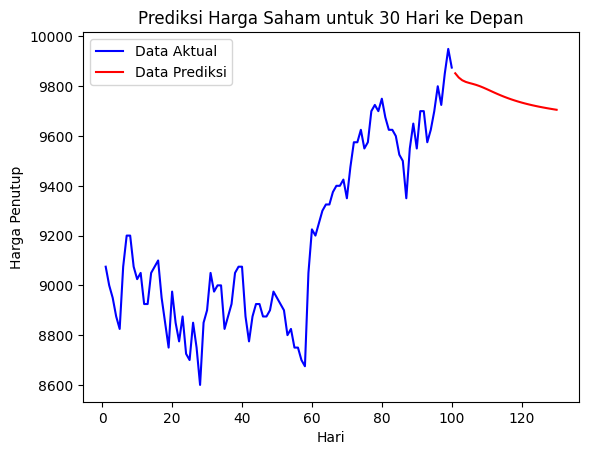

In [43]:
# Melakukan visualisasi data aktual dan prediksi
plt.plot(day_new, actual_data, label='Data Aktual', color='blue')
plt.plot(day_pred, predicted_data, label='Data Prediksi', color='red')
plt.title('Prediksi Harga Saham untuk 30 Hari ke Depan')
plt.xlabel('Hari')
plt.ylabel('Harga Penutup')
plt.legend()
plt.show()

### Menggabungkan data aktual dan prediksi

In [44]:
# Menggabungkan data aktual dan prediksi menjadi satu array
combined_data = np.concatenate((actual_data, predicted_data), axis=0)

### Visualisasi data gabungan

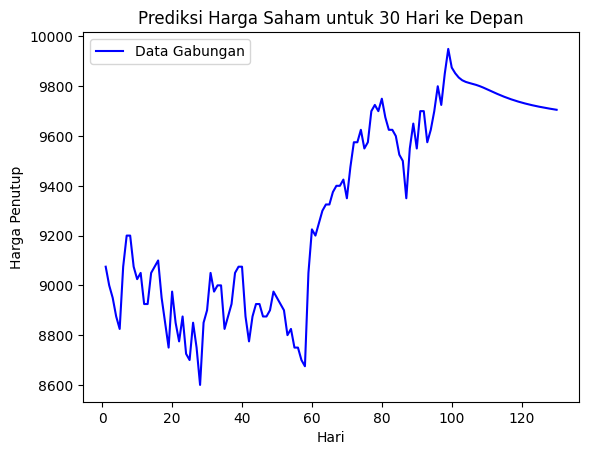

In [45]:
# Melakukan visualisasi data gabungan
plt.plot(day_combined, combined_data, label='Data Gabungan', color='blue')
plt.title('Prediksi Harga Saham untuk 30 Hari ke Depan')
plt.xlabel('Hari')
plt.ylabel('Harga Penutup')
plt.legend()
plt.show()